# 유한차분법(Finite Difference Method, FDM)

##### 미분방정식을 차분방정식으로 이산화시켜 수치적인 해를 구하는 것

In [2]:
# # 토마스 알고리즘
# import numpy as np

# def thomas(alpha,beta,gamma,f):
#     n=len(f)
#     v=np.zeros(n)
#     [aa,dd,cc,bb] = map(np.array, [alpha,beta,gamma,f])
#     for i in range(1,n):
#         mult=aa[i]/dd[i-1]
#         dd[i]=dd[i]-mult*cc[i-1]
#         bb[i]=bb[i]-mult*bb[i-1]
#     v[n-1] = bb[n-1]/dd[n-1]
#     for i in range(n-2,-1,-1):
#         v[i]=(bb[i]-cc[i]*v[i+1])/dd[i]

#     return v

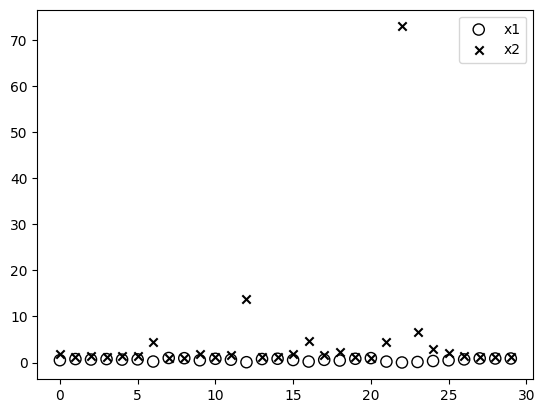

In [2]:
# 토마스 알고리즘이 제대로 작동하는지 확인 (x1과 x2의 값이 같아야 함.)
import numpy as np
import thomas as tho
import matplotlib.pyplot as plt

n = 30
x = np.linspace(0, n-1, n)
a = np.random.rand(n)
d = 100 + np.random.rand(n)
c = np.random.rand(n)
A = np.zeros((n, n))

for i in range(1, n):
    A[i, i-1] = a[i]
for i in range(0, n):
    A[i, i] = d[i]
for i in range(0, n-1):
    A[i, i+1] = c[i]

x1 = np.random.rand(n)
b = np.dot(A, x1)
x2 = tho.thomas(a, b, c, d)

plt.scatter(x, x1, s=65, facecolors='none', edgecolors='k', label='x1')
plt.scatter(x, x2, color='k', marker='x', label='x2')
plt.legend(loc='upper right')
plt.show()

### 토마스 알고리즘으로 블랙-숄즈 방정식 해 구하기

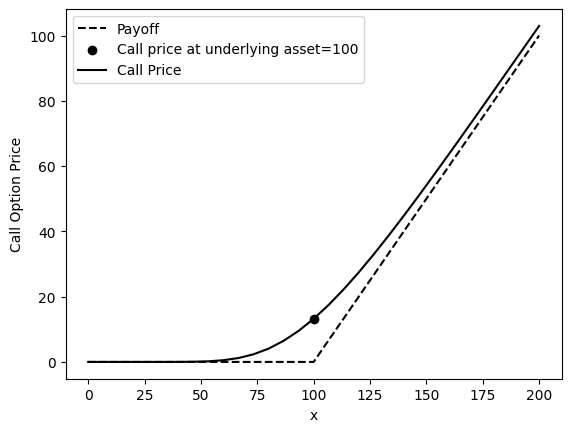

Price=13.207513


In [41]:
import numpy as np 
import matplotlib.pyplot as plt
import thomas as tho

K=100; R=200; volatility=0.3; r=0.03; T=1 #행사가격, 도메인의 최대값, 변동성, 무위험 이자율
Nx=31; Nt=360; dt=T/Nt #x격자갯수, 시간격자갯수, 시간격자간격

x = np.linspace(0, R, Nx) #기초자산
h=x[1]-x[0] #x격자간격

u=np.zeros([Nx, Nt+1]) #초기값(0행렬)

#초기값
# for i in range(0,Nx):
#     u[i,0]=np.maximum(x[i]-K,0)

# 초기값
for i in range(0, Nx):
    u[i, 0] = max(x[i] - K, 0)

#페이오프
plt.plot(x, u[:,0],'k--',label='Payoff')
[a,d,c,b]=map(np.zeros,[Nx,Nx,Nx,Nx])

#유한차분법에 사용하는 계수
for i in range(0,Nx):
    a[i]=r*x[i]/(2*h)-(volatility*x[i])**2/(2*h**2)
    d[i]=(1/dt)+((volatility*x[i])**2/(h**2))+r
    c[i]=-r*x[i]/(2*h)-(volatility*x[i])**2/(2*h**2)

#선형 경계조건
d[Nx-1]= d[Nx-1]+2*c[Nx-1]
a[Nx-1]= a[Nx-1]-c[Nx-1]

#유한차분법, 토마스알고리즘 --> 옵션가격
for n in range(0,Nt):
    b=u[:,n]/dt
    u[:,n+1]=tho.thomas(a,d,c,b)


ii=np.where(x==100) #x=100의 인덱스 찾기

#기초자산가격이 100일경우 콜옵션 가격
plt.scatter(x[ii],u[ii,Nt],color='k', label='Call price at underlying asset=100')

#옵션가격
plt.plot(x, u[:,Nt],'k-', label='Call Price')
plt.xlabel("x", fontsize=10)
plt.ylabel("Call Option Price", fontsize=10)
plt.legend(loc='upper left')
plt.show()

#기초자산가격이 100일경우 콜옵션 가격
print('Price=%f'%(u[ii,Nt]))

### 오류 수정

In [40]:
'''
# 디버깅 출력
for n in range(0, Nt):
    b = u[:, n] / dt
    u[:, n + 1] = tho.thomas(np.copy(a), np.copy(b), np.copy(c), np.copy(d))
    
    # 디버깅 출력 추가
    print(f"Iteration {n + 1}: {u[:, n + 1]}")
'''

Iteration 1: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration 2: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration 3: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration 4: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration 5: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration 6: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration 7: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration 8: [nan na

In [33]:
'''
nan_indices = np.isnan(u[:, Nt])
print("NaN indices:", x[nan_indices])
'''

NaN indices: [  0.           6.66666667  13.33333333  20.          26.66666667
  33.33333333  40.          46.66666667  53.33333333  60.
  66.66666667  73.33333333  80.          86.66666667  93.33333333
 100.         106.66666667 113.33333333 120.         126.66666667
 133.33333333 140.         146.66666667 153.33333333 160.
 166.66666667 173.33333333 180.         186.66666667 193.33333333
 200.        ]


In [38]:
'''
# 초기값 확인
print(f"Initial values: {u[:, 0]}")
# dt 값 확인
print(f"dt: {dt}")
# volatility 값 확인
print(f"volatility: {volatility}")
'''

Initial values: [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           6.66666667  13.33333333  20.          26.66666667
  33.33333333  40.          46.66666667  53.33333333  60.
  66.66666667  73.33333333  80.          86.66666667  93.33333333
 100.        ]
dt: 0.002777777777777778
volatility: 0.3


In [37]:
'''
print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")
print(f"d: {d}")
'''
# b에서 문제 발견. b와 d 잘못 쓴거 확인했고 코드 수정 완료.

a: [ 0.000e+00 -3.000e-02 -1.500e-01 -3.600e-01 -6.600e-01 -1.050e+00
 -1.530e+00 -2.100e+00 -2.760e+00 -3.510e+00 -4.350e+00 -5.280e+00
 -6.300e+00 -7.410e+00 -8.610e+00 -9.900e+00 -1.128e+01 -1.275e+01
 -1.431e+01 -1.596e+01 -1.770e+01 -1.953e+01 -2.145e+01 -2.346e+01
 -2.556e+01 -2.775e+01 -3.003e+01 -3.240e+01 -3.486e+01 -3.741e+01
  9.000e-01]
b: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
c: [ -0.    -0.06  -0.21  -0.45  -0.78  -1.2   -1.71  -2.31  -3.    -3.78
  -4.65  -5.61  -6.66  -7.8   -9.03 -10.35 -11.76 -13.26 -14.85 -16.53
 -18.3  -20.16 -22.11 -24.15 -26.28 -28.5  -30.81 -33.21 -35.7  -38.28
 -40.95]
d: [360.03 360.12 360.39 360.84 361.47 362.28 363.27 364.44 365.79 367.32
 369.03 370.92 372.99 375.24 377.67 380.28 383.07 386.04 389.19 392.52
 396.03 399.72 403.59 407.64 411.87 416.28 420.87 425.64 430.59 435.72
 359.13]


### 비균일 격자(Non-uniform mesh grid)에서의 함축적 방법으로 블랙-숄즈 방정식 풀기
- 앞선 균일 격자 예시와 달리 비균일 격자를 적용해보기

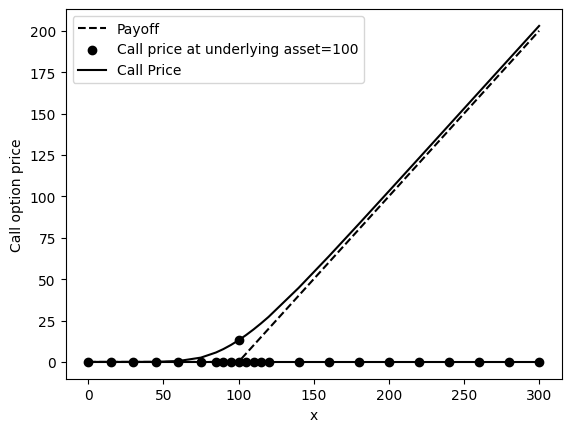

Price=13.069568


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import thomas as tho

#행사가격, 변동성, 무위험이자율, 만기, 시간격자갯수, 시간격자간격
K=100; volatility=0.3; r=0.03
T=1; Nt=360; dt=T/Nt

# 비균일하게 나눈 기초자산
A=np.arange(0,80,15)
B=np.arange(85,125,5)
C=np.arange(140,320,20)

x=np.r_[A,B,C]
h=np.diff(x)
h=np.r_[h[0],h,h[-1]] #x 격자 간격
Nx=len(x) #x 격자 갯수

# 초깃값을 위해 만드는 0으로만 이루어진 행렬
u=np.zeros([Nx,Nt+1])
u[:,0]=np.maximum(x-K,0) #초깃값

# 페이오프, 옵션가격 그래프
plt.plot(x,u[:,0],'k--',label='Payoff')
[a,d,c,b]=map(np.zeros,[Nx-1,Nx-1,Nx-1,Nx-1])
a[:] = (-volatility**2*x[1:Nx]**2+r*x[1:Nx]*h[2:Nx+1])/(h[1:Nx]*(h[1:Nx]+h[2:Nx+1]))
d[:] = (volatility**2*x[1:Nx]**2-r*x[1:Nx]*(h[2:Nx+1]-h[1:Nx]))/(h[1:Nx]*h[2:Nx+1])+r+1/dt
c[:] = (-volatility**2*x[1:Nx]**2-r*x[1:Nx]*h[1:Nx])/(h[2:Nx+1]*(h[1:Nx]+h[2:Nx+1]))

#선형 경계조건
a[Nx-2] = a[Nx-2]-c[Nx-2]
d[Nx-2] = d[Nx-2]+2*c[Nx-2]

#유한차분법과 토마스 알고리즘을 이용해 옵션가격 계산
for n in range(0,Nt):
    b=u[1:Nx,n]/dt
    u[1:Nx,n+1]=tho.thomas(a,d,c,b)

# np.where 함수를 이용하여 x=100인 x의 인덱스 찾기
ii=np.where(x==100)

# 기초자산가격이 100일 경우 콜옵션 가격 그리기
plt.scatter(x[ii],u[ii,Nt],color='k',label='Call price at underlying asset=100')
# 옵션 가격 그래프
plt.plot(x,u[:,Nt],'k-',label='Call Price')

# 비균일한 기초자산 그리기
plt.plot(x,0*u[:,Nt],'ko-')
plt.xlabel('x',fontsize=10)
plt.ylabel('Call option price', fontsize=10)
plt.legend(loc='upper left')
plt.show()
# 기초자산가격이 100일 경우 콜옵션 가격 출력
print('Price=%f'%(u[ii,Nt]))

### Operator Splitting method (OSM)
- 연산자 분해 방법: n차원의 문제를 n개의 1차원으로 분해하여 계산.

In [2]:
import numpy as np
import thomas as tho
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

OSM으로 균일격자에서의 2차원 블랙숄즈 방정식 계산 == 기초자산이 2개인 콜옵션의 가격

x=100, y=100일때 콜옵션의 가격

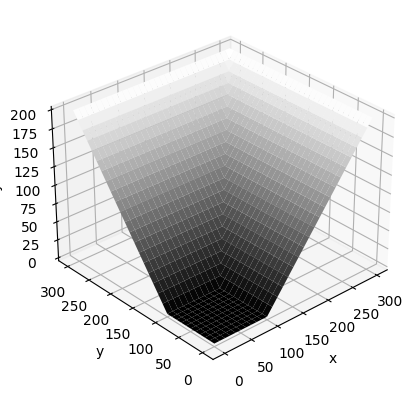

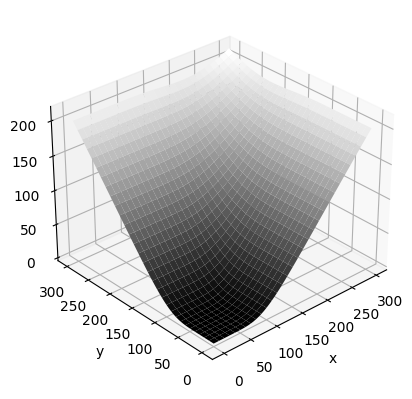

Price=21.532784


In [3]:
#xmax, 기초자산xy의 행사가격, 기초자산xy의 격자 갯수
R=300; Kx=100; Ky=100; Nx=61; Ny=61
x=np.linspace(0,R,Nx); y=np.linspace(0,R,Ny)
# 기초자산의 변동성, 상관계수, 이자율
x_volatility=0.3; y_volatility=0.3; rho=0.3; r=0.03
# 공간격자크기, 시간격자크기, 만기, 시간 간격 갯수
h=x[1]-x[0]; dt=1/365; T=1; Nt=T/dt

# 유한차분법으로 옵션 가격을 구하기 위한 초깃값
u0=np.zeros((Nx,Ny))
for i in range(Nx):
    for j in range(Ny):
        u0[i,j]=np.maximum(np.maximum(x[i]-Kx,y[j]-Ky),0)

# Payoff 그래프
X,Y = np.meshgrid(x,y)
fig1 = plt.figure()
#ax=fig1.gca(projection='3d')
ax=fig1.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,u0[:,:], cmap=plt.cm.gray)
ax.view_init(elev=30., azim=-132)
ax.set_xlabel('x',fontsize=10)
ax.set_ylabel('y',fontsize=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Payoff', rotation=90, fontsize=10)
plt.show()

# x,y에 대한 0으로 된 벡터 생성
[ax,dx,cx,ay,dy,cy] = map(np.zeros,[Nx-2,Nx-2,Nx-2,Ny-2,Ny-2,Ny-2])

#유한차분법을 사용하기 위한 x,y에 대한 계수
ax[:] = -(x_volatility*x[1:Nx-1])**2/(2*h**2)+r*x[1:Nx-1]/(2*h)
dx[:] = 1/dt+(x_volatility*x[1:Nx-1]/h)**2+r/2
cx[:] = -(x_volatility*x[1:Nx-1])**2/(2*h**2)-r*x[1:Nx-1]/(2*h)

ay[:] = -(y_volatility*y[1:Ny-1])**2/(2*h**2)+r*y[1:Ny-1]/(2*h)
dy[:] = 1/dt+(y_volatility*y[1:Ny-1]/h)**2+r/2
cy[:] = -(y_volatility*y[1:Ny-1])**2/(2*h**2)-r*x[1:Ny-1]/(2*h)

u=u0; u2=u0
[fx,fy] = map(np.zeros, [Nx-2,Ny-2])

# OSM과 토마스 알고리즘을 이용해 옵션 가격 계산
for n in range (int(Nt)):
    u[0,0:Ny-1]=2*u[1,0:Ny-1]-u[2,0:Ny-1]
    u[0:Nx-1,0]=2*u[0:Nx-1,1]-u[0:Nx-1,2]
    u[Nx-1,2:Ny-2]=2*u[Nx-2,2:Ny-2]-u[Nx-3,2:Ny-2]
    u[2:Nx-2,Ny-1]=2*u[2:Nx-2,Ny-2]-u[2:Nx-2,Ny-3]
    u[1,Ny-1]=2*u[2,Ny-2]-u[3,Ny-3]
    u[0,Ny-2]=2*u[1,Ny-3]-u[2,Ny-4]
    u[0,Ny-1]=2*u[1,Ny-2]-u[2,Ny-3]
    u[Nx-1,1]=2*u[Nx-2,2]-u[Nx-3,3]
    u[Nx-2,0]=2*u[Nx-3,1]-u[Nx-4,2]
    u[Nx-1,0]=2*u[Nx-2,1]-u[Nx-3,2]

    u[Nx-1,Ny-1]=2*u[Nx-2,Ny-2]-u[Nx-3,Ny-3]
    u[Nx-2,Ny-1]=2*u[Nx-3,Ny-2]-u[Nx-4,Ny-3]
    u[Nx-1,Ny-2]=2*u[Nx-2,Ny-3]-u[Nx-3,Ny-4]

#x축으로 풀기
    for j in range (1,Ny-1):
        fx[:]=u[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility*x[1:Nx-1]*y[j]*(u[2:Nx,j+1]+u[0:Nx-2,j-1]-u[0:Nx-2,j+1]-u[2:Nx,j-1])/(4*h**2)

        #디리클레 경계조건
        fx[0]=fx[0]-ax[0]*u[0,j]
        fx[Nx-3]=fx[Nx-3]-cx[Nx-3]*u[-1,j]
        u2[1:Nx-1,j]=tho.thomas(ax,dx,cx,fx)

# hybrid 경계조건    
    u2[0,0:Ny-1]=2*u2[1,0:Ny-1]-u2[2,0:Ny-1]
    u2[0:Nx-1,0]=2*u2[0:Nx-1,1]-u2[0:Nx-1,2]

    u2[Nx-1,2:Ny-2]=2*u2[Nx-2,2:Ny-2]-u2[Nx-3,2:Ny-2]
    u2[2:Nx-2,Ny-1]=2*u2[2:Nx-2,Ny-2]-u2[2:Nx-2,Ny-3]

    u2[1,Ny-1]=2*u2[2,Ny-2]-u2[3,Ny-3]
    u2[0,Ny-2]=2*u2[1,Ny-3]-u2[2,Ny-4]
    u2[0,Ny-1]=2*u2[1,Ny-2]-u2[2,Ny-3]

    u2[Nx-1,1]=2*u2[Nx-2,2]-u2[Nx-3,3]
    u2[Nx-2,0]=2*u2[Nx-3,1]-u2[Nx-4,2]
    u2[Nx-1,0]=2*u2[Nx-2,1]-u2[Nx-3,2]

    u2[Nx-1,Ny-1]=2*u2[Nx-2,Ny-2]-u2[Nx-3,Ny-3]
    u2[Nx-2,Ny-1]=2*u2[Nx-3,Ny-2]-u2[Nx-4,Ny-3]
    u2[Nx-1,Ny-2]=2*u2[Nx-2,Ny-3]-u2[Nx-3,Ny-4]

#y축으로 풀기
    for i in range (1,Nx-1):
        fy[:]=u2[i,1:Ny-1]/dt+0.5*rho*x_volatility*y_volatility*x[i]*y[1:Ny-1]*(u2[i+1,2:Ny]+u2[i-1,0:Ny-2]-u[i-1,2:Ny]-u[i+1,0:Ny-2])/(4*h**2)
        #디리클레 경계조건
        fy[0]=fy[0]-ay[0]*u2[i,0]
        fy[Ny-3]=fy[Ny-3]-cy[Ny-3]*u2[i,-1]
        u[i,1:Ny-1]=tho.thomas(ay,dy,cy,fy)

#옵션가격 그래프 그리기
fig2=plt.figure()
#bx=fig2.gca(projection='3d')
bx=fig2.add_subplot(111, projection='3d')
bx.plot_surface(X,Y,u[:,:],cmap=plt.cm.gray)
bx.view_init(elev=30., azim=-132)
bx.set_xlabel('x', fontsize=10)
bx.set_ylabel('y', fontsize=10)

bx.zaxis.set_rotate_label(False)
bx.set_zlabel('Call option prcie', rotation=90, fontsize=10)
plt.show()
# x와 y가 100인 인덱스를 찾기
ii=np.where(x==100)
jj=np.where(y==100)
print('Price=%f'%(u[ii,jj]))
# 초기조건(1)과 OSM(2)으로 푼 기초자산이 2개인 블랙숄즈 방정식

비균일 격자로 3차원 블랙숄즈 방정식을 OSM으로 풀기

In [15]:
import numpy as np
import thomas as tho

# 행사가 근처에서 촘촘하게 나눈 비균일한 기초자산1
x1=np.array([0])
x2=np.arange(64,132,2)
x3=np.array([170,180,200,201,213,223,242,255,267,278,289,300])
x=np.r_[x1,x2,x3]

# 행사가 근처에서 촘촘하게 나눈 비균일한 기초자산2
y1=np.array([0])
y2=np.arange(60,126,2)
y3=np.array([160,175,200,202,214,215,252,267,278,279,282,300])
y=np.r_[y1,y2,y3]

#행사가 근처에서 촘촘하게 나눈 비균일한 기초자산3
z1=np.array([0])
z2=np.arange(70,136,2)
z3=np.array([165,173,200,205,206,222,234,268,269,270,282,300])
z=np.r_[z1,z2,z3]

#각 자산의 변동성과 상관계수
x_volatility=0.3; y_volatility=0.3; z_volatility=0.3
rho_xy=0.4; rho_yz=0.4; rho_xz=0.4
#무위험 이자율과 만기
r=0.015; T=1

#기초자산의 행사가, 시간격자 갯수와 크기
K1=100; K2=K1; K3=K1; Nt=360; dt=1/Nt
#기초자산 격자 갯수
Nx=len(x); Ny=len(y); Nz=len(z)
#기초자산 격자 크기 행렬
hx=np.diff(x); hy=np.diff(y); hz=np.diff(z)

u0=np.zeros((Nx,Ny,Nz))
u=np.zeros((Nx,Ny,Nz))
u1=np.zeros((Nx,Ny,Nz))
u2=np.zeros((Nx,Ny,Nz))

# 유한차분법으로 옵션 가격을 구하기 위한 초깃값
for i in range(Nx):
    for j in range(Ny):
        for k in range(Nz):
            u0[i,j,k]=np.maximum(np.maximum(np.maximum(x[i]-K1,y[j]-K2),z[k]-K3),0)

[ax,dx,cx,ay,dy,cy,az,dz,cz] = map(np.zeros,[Nx-2,Nx-2,Nx-2,Ny-2,Ny-2,Ny-2,Nz-2,Nz-2,Nz-2])

# 유한차분법을 사용하기 위한 x,y,z에 대한 계수
ax[:]=(-(x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[1:Nx-1])/(hx[0:Nx-2]*(hx[0:Nx-2]+hx[1:Nx-1]))
dx[:]=1.0/dt+(x_volatility*x[1:Nx-1])**2/(hx[0:Nx-2]*hx[1:Nx-1])-r*x[1:Nx-1]*(hx[1:Nx-1]-hx[0:Nx-2])/(hx[0:Nx-2]*hx[1:Nx-1])+r/3
cx[:] = -((x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[0:Nx-2])/(hx[1:Nx-1]*(hx[0:Nx-2]+hx[1:Nx-1]))
# 선형 경계조건
ax[Nx-3]=ax[Nx-3]-cx[Nx-3]
dx[Nx-3]=dx[Nx-3]+2*cx[Nx-3]
ay[:]=(-(y_volatility*y[1:Ny-1])**2+r*x[1:Ny-1]*hy[1:Ny-1])/(hy[0:Ny-2]*(hy[0:Ny-2]+hy[1:Ny-1]))
dy[:]=1.0/dt+(y_volatility*y[1:Ny-1])**2/(hy[0:Ny-2]*hy[1:Ny-1])-r*y[1:Ny-1]*(hy[1:Ny-1]-hy[0:Ny-2])/(hy[0:Ny-2]*hy[1:Ny-1])+r/3
cy[:] = -((y_volatility*y[1:Ny-1])**2+r*y[1:Ny-1]*hy[0:Ny-2])/(hy[1:Ny-1]*(hx[0:Ny-2]+hy[1:Ny-1]))

# 선형 경계조건
ay[Ny-3]=ay[Ny-3]-cy[Ny-3]
dy[Ny-3]=dy[Ny-3]+2*cy[Ny-3]
az[:]=(-(z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[1:Nz-1])/(hz[0:Nz-2]*(hz[0:Nz-2]+hz[1:Nz-1]))
dz[:]=1.0/dt+(z_volatility*z[1:Nz-1])**2/(hz[0:Nz-2]*hz[1:Nz-1])-r*z[1:Nz-1]*(hz[1:Nz-1]-hz[0:Nz-2])/(hz[0:Nz-2]*hz[1:Nz-1])+r/3
cz[:] = -((z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[0:Nz-2])/(hz[1:Nz-1]*(hz[0:Nz-2]+hz[1:Nz-1]))

#선형 경계조건
az[Nz-3]=az[Nz-3]-cz[Nz-3]
dz[Nz-3]=dz[Nz-3]+2*cz[Nz-3]

[fx,fy,fz] = map(np.zeros,[Nx-2,Ny-2,Nz-2])

u=u0

#OSM과 토마스 알고리즘을 이용해 옵션 가격 계산
for n in range(Nt):
    #X축 방향으로 풀기
    for j in range(1,Ny-1):
        for k in range(1,Nz-1):
            fx[0:Nx-1]=(1/3)*(rho_xy*x_volatility*\
                              y_volatility*x[1:Nx-1]*y[j]*\
                              (u[2:Nx,j+1,k]-u[2:Nx,j-1,k]\
                               -u[0:Nx-2,j+1,k]+u[0:Nx-2,j-1,k])\
                                /(hx[0:Nx-2]*hy[j]+hx[1:Nx-1]\
                                  *hy[j]+hx[1:Nx-1]*hy[j-1]\
                                  +hx[0:Nx-2]*hy[j-1])+rho_xz\
                                    *x_volatility*z_volatility\
                                    *x[1:Nx-1]*z[k]*(u[2:Nx,j,k+1]\
                                                     -u[2:Nx,j,k-1]-u[0:Nx-2,j,k+1]\
                                                     +u[0:Nx-2,j,k-1])/(hx[0:Nx-2]\
                                                                        *hz[k]+hx[1:Nx-1]*hz[k]+hz[1:Nx-1]\
                                                                        *hz[k-1]+hx[0:Nx-2]*hz[k-1])+rho_yz\
                                                                          *y_volatility*z_volatility*y[j]*z[k]\
                                                                          *(u[1:Nx-1,j+1,k+1]-u[1:Nx-1,j+1,k-1]\
                                                                            -u[1:Nx-1,j-1,k+1]+u[1:Nx-1,j-1,k-1])\
                                                                            /(hy[j-1]*hz[k]+hy[j]\
                                                                              *hz[k]+hy[j]*hz[k-1]+hy[j-1]*hz[k-1]))\
                                                                                +u[1:Nx-1,j,k]/dt
            u1[1:Nx-1,j,k]=tho.thomas(ax,dx,cx,fx)

    #Y축 방향으로 풀기
    for k in range(1,Nz-1):
        for i in range(1,Nx-1):
            fy[0:Ny-1]=(1/3)*(rho_xy*x_volatility\
                              *y_volatility*x[i]*y[1:Ny-1]\
                                *(u1[i+1,2:Ny,k]-u1[i+1,0:Ny-2,k]\
                                  -u1[i-1,2:Ny,k]+u1[i-1,0:Ny-2,k])\
                                    /(hx[i-1]*hy[1:Ny-1]+hx[i]\
                                      *hy[1:Ny-1]+hx[i]*hy[0:Ny-2]\
                                        +hx[i-1]*hy[0:Ny-2])+rho_xz\
                                          *x_volatility*z_volatility\
                                            *x[i]*z[k]*(u1[i+1,1:Ny-1,k+1]\
                                                        -u1[i+1,1:Ny-1,k-1]-u1[i-1,1:Ny-1,k+1]\
                                                          +u1[i-1,1:Ny-1,k-1])/(hx[i-1]*hz[k]\
                                                                                *hz[k]+hx[1:Nx-1]*hz[k]+hz[1:Nx-1]\
                                                                                  *hx[i]*hz[k]+hx[i]*hz[k-1]\
                                                                                    +hz[i-1]*hz[k-1])+rho_yz*y_volatility\
                                                                                      *z_volatility*y[1:Ny-1]*z[k]\
                                                                                        *(u1[i,2:Ny,k+1]-u1[1,2:Ny,k-1]\
                                                                                          -u1[i,0:Ny-2,k+1]+u1[i,0:Ny-2,k-1])\
                                                                                            /(hy[0:Ny-2]*hz[k]+hy[1:Ny-1]*hz[k]\
                                                                                              +hy[1:Ny-1]*hz[k-1]+hy[0:Ny-2]*hz[k-1]))\
                                                                                                +u1[i,1:Ny-1,k]/dt
            u2[i,1:Ny-1,k]=tho.thomas(ay,dy,cy,fy)

    #Z축 방향으로 풀기  
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            fz[0:Ny-1]=(1/3)*(rho_xy*x_volatility\
                              *y_volatility*x[i]*y[j]\
                                *(u2[i+1,j+1,1:Nz-1]-u2[i+1,j-1,1:Nz-1]\
                                  -u2[i-1,j+1,1:Nz-1]+u2[i-1,j-1,1:Nz-1])\
                                    /(hx[i-1]*hy[j]+hx[i]*hy[j]+hx[i]*hy[j-1]+hx[i-1]\
                                      *hy[j-1])+rho_xz*x_volatility*z_volatility*x[i]*z[1:Nz-1]\
                                        *(u2[i+1,j,2:Nz]-u2[i+1,j,0:Nz-2]\
                                          -u2[i-1,j,2:Nz]+u2[i-1,j,0:Nz-2])\
                                            /(hx[i-1]*hz[1:Nz-1]\
                                              +hx[i]*hz[1:Nz-1]+hx[i]*hz[0:Nz-2]\
                                                +hx[i-1]*hz[0:Nz-2])+rho_yz*y_volatility*z_volatility*y[j]*z[1:Nz-1]\
                                                  *z_volatility*y[j]*z[1:Nz-1]\
                                                    *(u2[i,j+1,2:Nz]-u2[i,j+1,0:Nz-2]\
                                                      -u2[i,j-1,2:Nz]+u2[i,j-1,0:Nz-2])\
                                                        /(hy[j-1]*hz[1:Nz-1]+hy[j]*hz[1:Nz-1]\
                                                          +hy[j]*hz[0:Nz-2]+hy[j-1]*hz[0:Nz-2]))\
                                                            +u2[i,j,1:Nz-1]/dt
            u[i,j,1:Nz-1]=tho.thomas(az,dz,cz,fz)

# X가 100인 인덱스를 찾기 위해 np.where함수 이용
ii=np.argwhere(x==100)
jj=np.argwhere(y==100)
kk=np.argwhere(z==100)
#ii,jj,kk를 이용해 xyz가 100에서의 옵션가격 구하기
print('Price=%f' %(u[ii,jj,kk]))                                        

ValueError: operands could not be broadcast together with shapes (45,) (44,) 

오류슈정

### 주가연계증권(ELS)에 대한 유한차분법

#### 기초자산이 1개인 주가연계증권

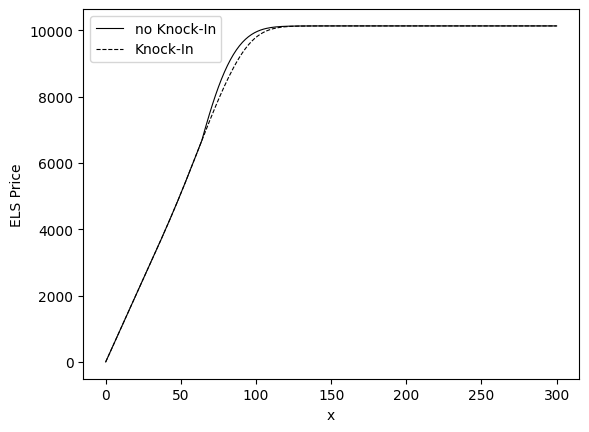

Price=9952.294492


In [22]:
# 몬테카를로 시뮬레이션이 아닌 유한차분법으로 ELS의 가격을 구해보기

import numpy as np
import matplotlib.pyplot as plt
import thomas as tho

# R=x,y 도메인의 최대값
facevalue = 10000; R=300; volatility = 0.1778
r=0.0165; Nx=301; h=R/Nx; x0=100

#기초자산
x=np.linspace(0,R,Nx); T=3
Nt=360*T; dt=T/Nt

#낙인 아래로 떨어지지 않는 경우와 떨어진 경우의 옵션가격 행렬 생성, 0
u=np.zeros((Nx,Nt+1)); ku=np.zeros((Nx,Nt+1))

#조기상환시 쿠폰 이자율
coupon_rate=np.array([0.132,0.11,0.088,0.066,0.044,0.022])

#조기행사가
strike_price=np.array([0.85,0.90,0.90,0.95,0.95,0.95])
#조기행사 시점 벡터
step=np.array([np.rint(Nt/6),np.rint(2*Nt/6), np.rint(3*Nt/6),np.rint(4*Nt/6), np.rint(5*Nt/6), Nt+1])

#더미 이자율, 낙인배리어
dummy = 0.312; kib=0.65

# 유한차분법으로 ELS가격을 구하기 위한 초기값
for i in range (0,Nx):
    if (x[i]<kib*x0):
        u[i,0]=x[i]/x0*facevalue
        ku[i,0]=x[i]/x0*facevalue
    elif (x[i]<strike_price[0]*x0):
        u[i,0]=facevalue*(1+dummy)
        ku[i,0]=x[i]/x0*facevalue
    else:
        u[i,0]=facevalue*(1+coupon_rate[0])
        ku[i,0]=facevalue*(1+coupon_rate[0])

[a,d,c,b]=map(np.zeros, [Nx,Nx,Nx,Nx])

#유한차분법을 사용하기 위한 계수
a[:] = r*x/(2*h)-(volatility*x)**2/(2*h**2)
d[:] = (volatility*x)**2/(h**2)+r+(1/dt)
c[:] = -r*x/(2*h)-(volatility*x)**2/(2*h**2)

#선형 경계조건
a[Nx-1]=a[Nx-1]-c[Nx-1]; d[Nx-1]=d[Nx-1]+2*c[Nx-1]
#조기상환을 진행하기 위한 변수
tag = 0

for n in range(0,Nt):
    #조기상환일의 페이오프
    if (n==step[tag]):
        #조기상환 조건을 만족하는 가장 작은 x값 찾기
        s=np.min(np.where(x>=x0*strike_price[tag+1]))
        # s값 이후로는 조기상환이 되기 때문에 쿠폰이자 지급
        u[s:Nx+1,n]=facevalue*(1+coupon_rate[tag+1])
        ku[s:Nx+1,n]=facevalue*(1+coupon_rate[tag+1])
        tag=tag+1

    #낙인배리어보다 아래 있는 x값 찾기
    s=np.min(np.where(x>=x0*kib))
    #낙인배리어 아래는 u값에 ku값 반영
    u[0:s,n]=ku[0:s,n]
    #유한차분법과 토마스 알고리즘을 통해 u,ku값 계산
    b=u[:,n]/dt
    u[:,n+1]=tho.thomas(a,d,c,b)
    b=ku[:,n]/dt
    ku[:,n+1]=tho.thomas(a,d,c,b)

#그래프 그리기
plt.figure(1)
plt.plot(u[:,Nt-1],'k',linewidth=0.8, label='no Knock-In')
plt.plot(ku[:,Nt-1], 'k--', linewidth=0.8, label='Knock-In')
plt.xlabel("x", fontsize=10)
plt.ylabel("ELS Price", fontsize=10)
plt.legend()
plt.show()
# x=100일 때의 ELS가격을 찾기 위해 np.where 함수 이용
ii=np.where(x==100)
print('Price=%f'%(u[ii,Nt]))

#### 기초자산이 2개인 주가연계증권

Price=9695.719421


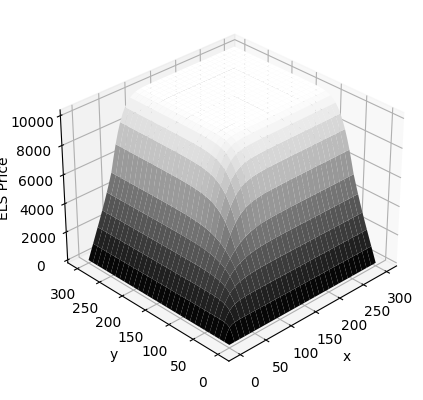

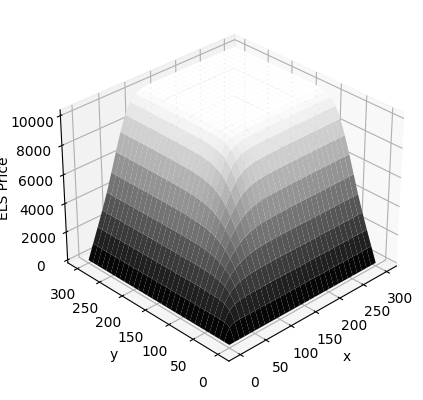

In [1]:
# 기초자산이 2개인 상품은 2차식이므로 OSM을 활용해 구한다. 각각 기초자산이 100, 100일 때의 ELS 가격을 구한다.

# 몬테카를로 시뮬레이션이 아닌 유한차분법으로 ELS의 가격을 구해보기

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import thomas as tho


facevalue = 10000; R=300
x_volatility = 0.249; y_volatility = 0.2182
#상관계수, 무위험이자율, 격자갯수, 격자간격, 최초기준가격
rho=0.0981; r=0.0165; Nx=61; Ny=Nx; h=R/Nx
x0=100; y0=100
#기초자산1,2
x=np.linspace(0,R,Nx); y=x
#만기, 시간격자갯수, 시간격자간격
T=3; Nt=360*T; dt=T/Nt

# 낙인배리어 아래로 떨어지지 않는 경우와 그렇지 않은 경우 ELS 가격 생성, 0
# OS방법을 사용하기 위해 u,ku 와 같은 크기의 행렬 생성
lst=[Nx,Ny]
[u,ku,old_u,old_ku] = map(np.zeros,[lst,lst,lst,lst])

#조기상환시 쿠폰 이자율
coupon_rate=np.array([0.15,0.125,0.10,0.075,0.05,0.025])
# 조기행사 시점 벡터
step=np.array([np.rint(Nt/6),np.rint(2*Nt/6),np.rint(3*Nt/6),np.rint(4*Nt/6),np.rint(5*Nt/6), Nt+1])

# 조기 행사가, 더미이자율, 낙인배리어
strike_price=np.array([0.75,0.80,0.85,0.85,0.90,0.90])
dummy=0.15; kib=0.50;

#유한차분법으로 ELS 가격을 구하기 위한 초깃값
for i in range (0,Nx):
    for j in range(0,Ny):
        if (x[i]<kib*x0 or y[j]<kib*y0):
            u[i,j]=np.minimum(x[i],y[j])/x0*facevalue
            ku[i,j]=np.minimum(x[i],y[j])/x0*facevalue
        elif (x[i]<=strike_price[0]*x0 or y[j]<=strike_price[0]*x0):
            u[i,j]=facevalue*(1+dummy)
            ku[i,j]=np.minimum(x[i],y[j])/x0*facevalue
        else:
            u[i,j]=facevalue*(1+coupon_rate[0])
            ku[i,j]=facevalue*(1+coupon_rate[0])

#유한차분법을 사용하기 위한 계수
[ax,dx,cx,ay,dy,cy]=map(np.zeros, [Nx-2,Nx-2,Nx-2,Ny-2,Ny-2,Ny-2])
ax[:] = -0.5*(x_volatility*x[1:Nx-1]/h)**2+0.5*r*x[1:Nx-1]/h
dx[:] = 1/dt+(x_volatility*x[1:Nx-1]/h)**2+r*0.5
cx[:] = -0.5*(x_volatility*x[1:Nx-1]/h)**2-0.5*r*x[1:Nx-1]/h
# 선형경계조건
ax[Nx-3]=ax[Nx-3]-cx[Nx-3]
dx[Nx-3]=dx[Nx-3]+2*cx[Nx-3]

ay[:]=-0.5*(y_volatility*y[1:Ny-1]/h)**2+0.5*r*y[1:Ny-1]/h
dy[:]=1/dt+(y_volatility*y[1:Ny-1]/h)**2+r*0.5
cy[:]=-0.5*(y_volatility*y[1:Ny-1]/h)**2-0.5*r*y[1:Nx-1]/h
#선형경계조건
ay[Ny-3]=ay[Ny-3]-cy[Ny-3]
dy[Ny-3]=dy[Ny-3]+2*cy[Ny-3]
tag = 0 #조기상환을 진행하기 위한 변수
bx=np.zeros(Nx-2); by=np.zeros(Nx-2)

for n in range(0,Nt):
    #조기상환일의 페이오프
    if (n==step[tag]):
        #조기상환 조건을 만족하는 가장 작은 x,y 값 찾기
        gx=np.min(np.where(x>=x0*strike_price[tag+1]))
        gy=np.min(np.where(y>=y0*strike_price[tag+1]))
        u[gx:Nx-1,gy:Ny-1]=facevalue*(1+coupon_rate[tag+1])
        ku[gx:Nx-1,gy:Ny-1]=facevalue*(1+coupon_rate[tag+1])
        #다음 조기상환일로 이동
        tag+=1
    
    #낙인 배리어보다 아래 있는 x,y값 찾기
    gx=np.min(np.where(x>=x0*kib))
    gy=np.min(np.where(y>=y0*kib))
    #낙인 배리어 아래구간의 u값에 ku값 반영
    u[:,0:gy+1]=ku[:,0:gy+1]
    u[0:gx+1,:]=ku[0:gx+1,:]
    old_u=u; old_ku=ku

    #OSM과 토마스 알고리즘을 이용하여 u값 계산
    #x축으로 풀기
    for j in range(1,Ny-1):
        bx[0:Nx-1]=old_u[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility*x[1:Nx-1]*y[j]*(old_u[2:Nx,j+1]-old_u[2:Nx,j-1]-old_u[0:Nx-2,j+1]+old_u[0:Nx-2,j-1])/(4*h**2)
        u[1:Nx-1,j]=tho.thomas(ax,dx,cx,bx)
    #보간법을 이용하여 마지막 값 계산
    u[Nx-1,1:Ny-1]=2*u[Nx-2,1:Ny-1]-u[Nx-3,1:Ny-1]
    u[:,Ny-1]=2*u[:,Ny-2]-u[:,Ny-3]
    old_u=u
    #y축으로 풀기
    for i in range(1,Nx-1):
        by[0:Ny-1]=old_u[i,1:Nx-1]/dt+0.5*rho*x_volatility*y_volatility*x[i]*y[1:Ny-1]*(old_u[i+1,2:Ny]-old_u[i+1,0:Ny-2]-old_u[i-1,2:Ny]+old_u[i-1,0:Ny-2])/(4*h**2)
        u[i,1:Ny-1]=tho.thomas(ay,dy,cy,by)
    #보간법을 이용하여 마지막 값 계산
    u[1:Nx-1,Ny-1]=2*u[1:Nx-1,Ny-2]-u[1:Nx-1,Ny-3]
    u[Nx-1,:]=2*u[Nx-2,:]-u[Nx-3,:]
    
    #x축으로 풀기
    for j in range(1,Ny-1):
        bx[0:Nx-1]=old_ku[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility*x[1:Nx-1]*y[j]*(old_ku[2:Nx,j+1]-old_ku[2:Nx,j-1]-old_ku[0:Nx-2,j+1]+old_ku[0:Nx-2,j-1])/(4*h**2)
        ku[1:Nx-1,j]=tho.thomas(ax,dx,cx,bx)
    #보간법을 이용하여 마지막 값을 계산
    ku[Nx-1,1:Ny-1]=2*ku[Nx-2,1:Ny-1]-ku[Nx-3,1:Ny-1]
    ku[:,Ny-1]=2*ku[:,Ny-2]-ku[:,Ny-3]
    old_ku=ku
    #y축으로 풀기
    for i in range(1,Nx-1):
        by[0:Ny-1]=old_ku[i,1:Ny-1]/dt+0.5*rho*x_volatility*y_volatility*x[i]*y[1:Ny-1]*(old_ku[i+1,2:Ny]-old_ku[i+1,0:Ny-2]-old_ku[i-1,2:Ny]+old_ku[i-1,0:Ny-2])/(4*h**2)
        ku[i,1:Ny-1]=tho.thomas(ay,dy,cy,by)
    #보간법을 이용하여 마지막 값 계산   
    ku[1:Nx-1,Ny-1]=2*ku[1:Nx-1,Ny-2]-ku[1:Nx-1,Ny-3]
    ku[Nx-1,:]=2*ku[Nx-2,:]-ku[Nx-3,:]


#그래프 그리기
X, Y = np.meshgrid(x, y)
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')  # 3D 축을 추가
ax.plot_surface(X, Y, u, cmap=plt.cm.gray)
ax.view_init(elev=31, azim=-134)
ax.set_xlabel('x',fontsize=10)
ax.set_ylabel('y',fontsize=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('ELS Price', rotation=90, fontsize=10)

fig2=plt.figure()
bx=fig2.add_subplot(111, projection='3d')
bx.plot_surface(X,Y,ku,cmap=plt.cm.gray)
bx.view_init(elev=31, azim=-134)
bx.set_xlabel('x',fontsize=10)
bx.set_ylabel('y', fontsize=10)
bx.zaxis.set_rotate_label(False)
bx.set_zlabel('ELS Price', rotation=90, fontsize=10)

ii=np.where(x==100)
jj=np.where(y==100)
print('Price=%f' %(u[ii,jj]))

### 기초자산이 3개인 주가연계증권

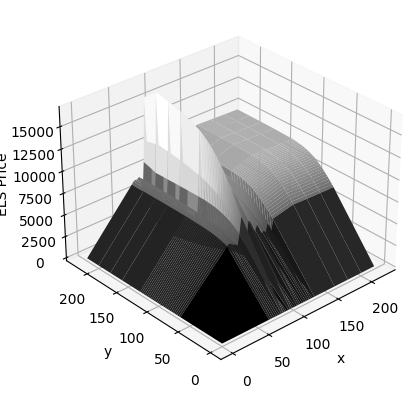

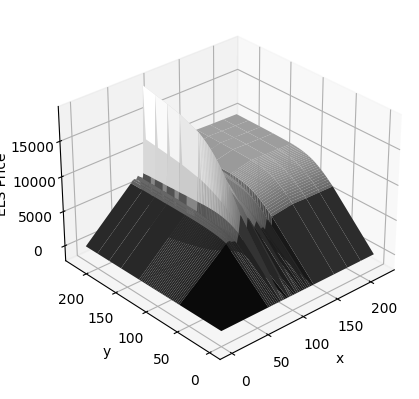

Price=6801.491851


In [7]:
# 미래에셋대우(ELS)22345(조기상환형), OSM 활용, 각각 기초자산이 100,100,100,일때의 ELS 가격

# 몬테카를로 시뮬레이션이 아닌 유한차분법으로 ELS의 가격을 구해보기

# 3개의 자산, 즉 3차원 이상에서는 계산의 효율성을 위해 비균일 격자 사용

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import thomas as tho

facevalue = 10000
x_volatility = 0.2662; y_volatility = 0.2105; z_volatility=0.2111
#상관계수, 무위험이자율
rho_xy=0.0981; rho_yz=0.5256; rho_zx=0.2895
r=0.0165
# 만기, 시간격자갯수, 시간격자간격
T=3; Nt=180*T; dt=T/Nt
# 최초 기준가격
x0=100; y0=100; z0=100

#비균일하게 격자를 쪼갠 기초자산1,2,3
A=np.array([0])
B=np.arange(65,132.5,2.5)
C=np.array([160,180,200,220])
x=np.r_[A,B,C]; y=x; z=x;

#x,y,z 벡터의 크기 , 간격벡터
Nx=len(x); Ny=Nx; Nz=Nx
hx=np.diff(x); hy=hx; hz=hx

# 조기상환시 쿠폰 이자율
coupon_rate = np.array([0.28, 0.24, 0.192, 0.144, 0.096, 0.048])

#초기행사 시점 벡터
step=np.arange(1,8,1)*Nt/6

#초기 행사가
strike_price = np.array([0.85,0.85,0.9,0.9,0.95,0.95])

#더미 이자율, 낙인 배리어
dummy=0.06; kib=0.50;

# 낙인 배리어 아래로 떨어지지 않는 경우, 떨어지는 경우 옵션가격 행렬, 0
lst=[Nx,Ny,Nz]
[u,ku]= map(np.zeros, [lst,lst])

#유한차분법으로 ELS 가격을 구하기 위한 초깃값
for i in range (0,Nx):
    for j in range(0,Ny):
        for k in range(0,Nz):
            if (x[i]<=kib*x0 or y[j]<=kib*y0 or z[k]<=kib*z0):
                u[i,j,k]=np.min([x[i],y[j],z[k]])/x0*facevalue
                ku[i,j,k]=np.min([x[i],y[j],z[k]])/x0*facevalue
            elif (x[i]<strike_price[0]*x0 or y[j]<strike_price[0]*y0 or z[k]<strike_price[0]*z0):
                u[i,j,k]=facevalue*(1.0+dummy)
                ku[i,j,k]=np.min([x[i],y[j],z[k]])/x0*facevalue
            else:
                u[i,j,k]=facevalue*(1+coupon_rate[0])
                ku[i,j,k]=facevalue*(1+coupon_rate[0])

#유한차분법을 사용하기 위한 계수
[ax,dx,cx,ay,dy,cy,az,dz,cz]=map(np.zeros, [Nx-2,Nx-2,Nx-2,Ny-2,Ny-2,Ny-2,Nz-2,Nz-2,Nz-2])
ax[:] = (-(x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[1:Nx-1])/(hx[0:Nx-2]*(hx[0:Nx-2]+hx[1:Nx-1]))
dx[:] = 1/dt+(x_volatility*x[1:Nx-1])**2/(hx[0:Nx-2]*hx[1:Nx-1])-r*x[1:Nx-1]*(hx[1:Nx-1]-hx[0:Nx-2])/(hx[0:Nx-2]*hx[1:Nx-1])+r/3
cx[:]= -((x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[0:Nx-2]) / (hx[1:Nx-1]*(hx[0:Nx-2]+hx[1:Nx-1]))
# 선형경계조건
ax[Nx-3]=ax[Nx-3]-cx[Nx-3]
dx[Nx-3]=dx[Nx-3]+2*cx[Nx-3]

ay[:] = (-(y_volatility*y[1:Ny-1])**2+r*y[1:Ny-1]*hy[1:Ny-1])/(hy[0:Ny-2]*(hy[0:Ny-2]+hy[1:Ny-1]))
dy[:] = 1/dt+(y_volatility*y[1:Nx-1])**2/(hy[0:Ny-2]*hy[1:Ny-1])-r*y[1:Ny-1]*(hy[1:Ny-1]-hy[0:Ny-2])/(hy[0:Ny-2]*hy[1:Ny-1])+r/3
cy[:]= -((y_volatility*y[1:Ny-1])**2+r*y[1:Ny-1]*hy[0:Ny-2]) / (hy[1:Ny-1]*(hy[0:Ny-2]+hy[1:Ny-1]))
#선형경계조건
ay[Ny-3]=ay[Ny-3]-cy[Ny-3]
dy[Ny-3]=dy[Ny-3]+2*cy[Ny-3]

az[:]=(-(z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[1:Nz-1])/(hz[0:Nz-2]*(hz[0:Nz-2]+hz[1:Nz-1]))
dz[:] = 1/dt+(z_volatility*z[1:Nz-1])**2/(hz[0:Nz-2]*hz[1:Nz-1])-r*z[1:Nz-1]*(hz[1:Nz-1]-hz[0:Nz-2])/(hz[0:Nz-2]*hz[1:Nz-1])+r/3
cz[:]= -((z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[0:Nz-2]) / (hz[1:Nz-1]*(hz[0:Nz-2]+hz[1:Nz-1]))
#선형경계조건
az[Nz-3]=az[Nz-3]-cz[Nz-3]
dz[Nz-3]=dz[Nz-3]+2*cz[Nz-3]

# OS 방법을 사용하기 위해 u, ku와 같은 크기의 행렬 생성
[old_u, old_ku] = map(np.zeros, [lst,lst])
[fx,fy,fz] = map(np.zeros,[Nx-2, Nx-2, Nx-2])
tag = 0 #조기상환을 진행하기 위한 변수

for iter in range(0,Nt):
    #조기상환일의 페이오프
    if iter==step[tag]:
        #조기상환 조건을 만족하는 가장작은 x,y,z값 찾기
        gx=np.min(np.where(x>=x0*strike_price[tag+1]))
        gy=np.min(np.where(y>=y0*strike_price[tag+1]))
        gz=np.min(np.where(z>=z0*strike_price[tag+1]))
        u[gx:Nx, gy:Ny, gz:Nz]=facevalue*(1+coupon_rate[tag+1])
        ku[gx:Nx, gy:Ny, gz:Nz] = facevalue*(1+coupon_rate[tag+1])
        #다음 조기상환일로 이동
        tag += 1
    #낙인배리어보다 아래 있는 x,y,z 값 찾기
    gx=np.min(np.where(x>=x0*kib))
    gy=np.min(np.where(y>=y0*kib))
    gz=np.min(np.where(z>=z0*kib))

    #낙인배리어 아래구간의 u값에 ku값 반영
    u[0:gx+1,:,:]=ku[0:gx+1,:,:]
    u[:,0:gy+1,:]=ku[:,0:gy+1,:]
    u[:,:,0:gz+1]=ku[:,:,0:gz+1]

    #OSM과 토마스 알고리즘을 이용하여 u값 계산
    #x축으로 풀기
    for j in range(1,Ny-1):
        for k in range(1,Nz-1):
            fx[0:Nx-1]=1/3*rho_xy*x_volatility*y_volatility*x[1:Nx-1]*y[j]\
            *(u[2:Nx,j+1,k]-u[2:Nx,j-1,k]\
              -u[0:Nx-2,j+1,k]+u[0:Nx-2,j-1,k])\
              /(hx[0:Nx-2]*hy[j]+hx[1:Nx-1]\
               *hy[j]+hx[1:Nx-1]*hy[j-1]+hx[0:Nx-2]\
                *hy[j-1])+1/3*rho_zx*x_volatility\
                    *z_volatility*x[1:Nx-1]*z[k]\
                    *(u[2:Nx,j,k+1]-u[2:Nx,j,k-1]\
                        -u[0:Nx-2,j,k+1]+u[0:Nx-2,j,k-1])\
                        /(hx[0:Nx-2]*hz[k]+hx[1:Nx-1]*hz[k]\
                          +hx[1:Nx-1]*hz[k-1]+hx[0:Nx-2]*hz[k-1])\
                            +1/3*rho_yz*y_volatility*z_volatility\
                                *y[j]*z[k]*(u[1:Nx-1,j+1,k+1]\
                                            -u[1:Nx-1,j+1,k+1]-u[1:Nx-1,j-1,k+1]\
                                                +u[1:Nx-1,j-1,k-1])/(hy[j-1]*hz[k]\
                                                                     +hy[j]*hz[k]+hy[j]*hz[k-1]+hy[j-1]\
                                                                        *hz[k-1])+u[1:Nx-1,j,k]/dt
            old_u[1:Nx-1,j,k]=tho.thomas(ax,dx,cx,fx)

    #보간법을 이용하여 마지막 값 구하기
    old_u[1:Nx-1,1:Ny-1,Nz-1]=2*old_u[1:Nx-1,1:Ny-1,Nz-2]-old_u[1:Nx-1,1:Ny-1,Nz-3]
    old_u[Nx-1,1:Ny-1,1:Nz]=2*old_u[Nx-2,1:Ny-1,1:Nz]-old_u[Nx-3,1:Ny-1,1:Nz]
    old_u[1:Nx,Ny-1,1:Nz]=2*old_u[1:Nx,Ny-2,1:Nz]-old_u[1:Nx,Ny-3,1:Nz]


    #y축으로 풀기
    for k in range(1,Nz-1):
        for i in range(1,Nx-1):
            fy[0:Ny-1]=1/3*rho_xy*x_volatility*y_volatility*x[i]*y[1:Ny-1]\
            *(old_u[i+1,2:Ny,k]-old_u[i+1,0:Ny-2,k]\
              -old_u[i-1,2:Ny,k]+old_u[i-1,0:Ny-2,k])\
              /(hx[i-1]*hy[1:Ny-1]+hx[i]\
               *hy[1:Ny-1]+hx[i]*hy[0:Ny-2]+hx[i-1]\
                *hy[0:Ny-2])+1/3*rho_zx*x_volatility\
                    *z_volatility*x[i]*z[k]\
                    *(old_u[i+1,1:Ny-1,k+1]-old_u[i+1,1:Ny-1,k-1]\
                        -old_u[i-1,1:Ny-1,k+1]+old_u[i-1,1:Ny-1,k-1])\
                        /(hx[i-1]*hz[k]+hx[i]*hz[k]\
                          +hx[i]*hz[k-1]+hx[i-1]*hz[k-1])\
                            +1/3*rho_yz*y_volatility*z_volatility\
                                *y[1:Ny-1]*z[k]*(old_u[i,2:Ny,k+1]\
                                            -old_u[i,2:Ny,k-1]-old_u[i,0:Ny-2,k+1]\
                                                +old_u[i,0:Ny-2,k-1])/(hy[0:Ny-2]*hz[k]\
                                                                     +hy[1:Ny-1]*hz[k]+hy[1:Ny-1]*hz[k-1]+hy[0:Ny-2]\
                                                                        *hz[k-1])+old_u[i,1:Ny-1,k]/dt
            u[i,1:Ny-1,k]=tho.thomas(ay,dy,cy,fy)
        
    #보간법을 이용하여 마지막 값 구하기
    u[1:Nx-1,1:Ny-1,Nz-1]=2*u[1:Nx-1,1:Ny-1,Nz-2]-u[1:Nx-1,1:Ny-1,Nz-3]
    u[Nx-1,1:Ny-1,1:Nz]=2*u[Nx-2,1:Ny-1,1:Nz]-u[Nx-3,1:Ny-1,1:Nz]
    u[1:Nx,Ny-1,1:Nz]=2*u[1:Nx,Ny-2,1:Nz]-u[1:Nx,Ny-3,1:Nz]

    #z축으로 풀기
    for j in range(1,Ny-1):
        for i in range(1,Nx-1):
            fz[0:Nz-1]=1/3*rho_xy*x_volatility*y_volatility*x[i]*y[j]\
            *(u[i+1,j+1,1:Nz-1]-u[i+1,j-1,1:Nz-1]\
              -u[i-1,j+1,1:Nz-1]+u[i-1,j-1,1:Nz-1])\
              /(hx[i-1]*hy[j]+hx[i]*hy[j]*hx[i]\
               *hy[j-1]+hx[i-1]*hy[j-1])+1/3*rho_zx*x_volatility\
                    *z_volatility*x[i]*z[1:Nz-1]\
                    *(u[i+1,j,2:Nz]-u[i+1,j,0:Nz-2]\
                        -u[i-1,j,2:Nz]+u[i-1,j,0:Nz-2])\
                        /(hx[i-1]*hz[1:Nz-1]+hx[i]*hz[1:Nz-1]\
                          +hx[i]*hz[0:Nz-2]+hx[i-1]*hz[0:Nz-2])\
                            +1/3*rho_yz*y_volatility*z_volatility\
                                *y[j]*z[1:Nz-1]*(u[i,j+1,2:Nz]\
                                            -u[i,j+1,0:Nz-2]-u[i,j-1,2:Nz]\
                                                +u[i,j-1,0:Nz-2])/(hy[j-1]*hz[1:Nz-1]\
                                                                     +hy[j]*hz[1:Nz-1]+hy[j]*hz[0:Nz-2]+hy[j-1]\
                                                                        *hz[0:Nz-2])+u[i,j,1:Nz-1]/dt
            old_u[i,j,1:Nz-1]=tho.thomas(az,dz,cz,fz)

    #보간법을 이용하여 마지막 값 구하기
    old_u[1:Nx-1,1:Ny-1,Nz-1]=2*old_u[1:Nx-1,1:Ny-1,Nz-2]-old_u[1:Nx-1,1:Ny-1,Nz-3]
    old_u[Nx-1,1:Ny-1,1:Nz]=2*old_u[Nx-2,1:Ny-1,1:Nz]-old_u[Nx-3,1:Ny-1,1:Nz]
    old_u[1:Nx,Ny-1,1:Nz]=2*old_u[1:Nx,Ny-2,1:Nz]-old_u[1:Nx,Ny-3,1:Nz]
    u=old_u

    #OSM과 토마스 알고리즘을 이용하여 ku 값 계산
    #x축으로 풀기
    for j in range(1,Ny-1):
        for k in range(1,Nz-1):
            fx[0:Nx-1]=1/3*rho_xy*x_volatility*y_volatility*x[1:Nx-1]*y[j]\
            *(ku[2:Nx,j+1,k]-ku[2:Nx,j-1,k]\
              -ku[0:Nx-2,j+1,k]+ku[0:Nx-2,j-1,k])\
              /(hx[0:Nx-2]*hy[j]+hx[1:Nx-1]\
               *hy[j]+hx[1:Nx-1]*hy[j-1]+hx[0:Nx-2]\
                *hy[j-1])+1/3*rho_zx*x_volatility\
                    *z_volatility*x[1:Nx-1]*z[k]\
                    *(ku[2:Nx,j,k+1]-ku[2:Nx,j,k-1]\
                        -ku[0:Nx-2,j,k+1]+ku[0:Nx-2,j,k-1])\
                        /(hx[0:Nx-2]*hz[k]+hx[1:Nx-1]*hz[k]\
                          +hx[1:Nx-1]*hz[k-1]+hx[0:Nx-2]*hz[k-1])\
                            +1/3*rho_yz*y_volatility*z_volatility\
                                *y[j]*z[k]*(ku[1:Nx-1,j+1,k+1]\
                                            -ku[1:Nx-1,j+1,k+1]-ku[1:Nx-1,j-1,k+1]\
                                                +ku[1:Nx-1,j-1,k-1])/(hy[j-1]*hz[k]\
                                                                     +hy[j]*hz[k]+hy[j]*hz[k-1]+hy[j-1]\
                                                                        *hz[k-1])+ku[1:Nx-1,j,k]/dt
            old_ku[1:Nx-1,j,k]=tho.thomas(ax,dx,cx,fx)

    #보간법을 이용하여 마지막 값 구하기
    old_ku[1:Nx-1,1:Ny-1,Nz-1]=2*old_ku[1:Nx-1,1:Ny-1,Nz-2]-old_ku[1:Nx-1,1:Ny-1,Nz-3]
    old_ku[Nx-1,1:Ny-1,1:Nz]=2*old_ku[Nx-2,1:Ny-1,1:Nz]-old_ku[Nx-3,1:Ny-1,1:Nz]
    old_ku[1:Nx,Ny-1,1:Nz]=2*old_ku[1:Nx,Ny-2,1:Nz]-old_ku[1:Nx,Ny-3,1:Nz]


    #y축으로 풀기
    for k in range(1,Nz-1):
        for i in range(1,Nx-1):
            fy[0:Ny-1]=1/3*rho_xy*x_volatility*y_volatility*x[i]*y[1:Ny-1]\
            *(old_ku[i+1,2:Ny,k]-old_ku[i+1,0:Ny-2,k]\
              -old_ku[i-1,2:Ny,k]+old_ku[i-1,0:Ny-2,k])\
              /(hx[i-1]*hy[1:Ny-1]+hx[i]\
               *hy[1:Ny-1]+hx[i]*hy[0:Ny-2]+hx[i-1]\
                *hy[0:Ny-2])+1/3*rho_zx*x_volatility\
                    *z_volatility*x[i]*z[k]\
                    *(old_ku[i+1,1:Ny-1,k+1]-old_ku[i+1,1:Ny-1,k-1]\
                        -old_ku[i-1,1:Ny-1,k+1]+old_ku[i-1,1:Ny-1,k-1])\
                        /(hx[i-1]*hz[k]+hx[i]*hz[k]\
                          +hx[i]*hz[k-1]+hx[i-1]*hz[k-1])\
                            +1/3*rho_yz*y_volatility*z_volatility\
                                *y[1:Ny-1]*z[k]*(old_ku[i,2:Ny,k+1]\
                                            -old_ku[i,2:Ny,k-1]-old_ku[i,0:Ny-2,k+1]\
                                                +old_ku[i,0:Ny-2,k-1])/(hy[0:Ny-2]*hz[k]\
                                                                     +hy[1:Ny-1]*hz[k]+hy[1:Ny-1]*hz[k-1]+hy[0:Ny-2]\
                                                                        *hz[k-1])+old_ku[i,1:Ny-1,k]/dt
            ku[i,1:Ny-1,k]=tho.thomas(ay,dy,cy,fy)
        
    #보간법을 이용하여 마지막 값 구하기
    ku[1:Nx-1,1:Ny-1,Nz-1]=2*ku[1:Nx-1,1:Ny-1,Nz-2]-ku[1:Nx-1,1:Ny-1,Nz-3]
    ku[Nx-1,1:Ny-1,1:Nz]=2*ku[Nx-2,1:Ny-1,1:Nz]-ku[Nx-3,1:Ny-1,1:Nz]
    ku[1:Nx,Ny-1,1:Nz]=2*ku[1:Nx,Ny-2,1:Nz]-ku[1:Nx,Ny-3,1:Nz]

    #z축으로 풀기
    for j in range(1,Ny-1):
        for i in range(1,Nx-1):
            fz[0:Nz-1]=1/3*rho_xy*x_volatility*y_volatility*x[i]*y[j]\
            *(ku[i+1,j+1,1:Nz-1]-ku[i+1,j-1,1:Nz-1]\
              -ku[i-1,j+1,1:Nz-1]+ku[i-1,j-1,1:Nz-1])\
              /(hx[i-1]*hy[j]+hx[i]*hy[j]*hx[i]\
               *hy[j-1]+hx[i-1]*hy[j-1])+1/3*rho_zx*x_volatility\
                    *z_volatility*x[i]*z[1:Nz-1]\
                    *(ku[i+1,j,2:Nz]-ku[i+1,j,0:Nz-2]\
                        -ku[i-1,j,2:Nz]+ku[i-1,j,0:Nz-2])\
                        /(hx[i-1]*hz[1:Nz-1]+hx[i]*hz[1:Nz-1]\
                          +hx[i]*hz[0:Nz-2]+hx[i-1]*hz[0:Nz-2])\
                            +1/3*rho_yz*y_volatility*z_volatility\
                                *y[j]*z[1:Nz-1]*(ku[i,j+1,2:Nz]\
                                            -ku[i,j+1,0:Nz-2]-ku[i,j-1,2:Nz]\
                                                +ku[i,j-1,0:Nz-2])/(hy[j-1]*hz[1:Nz-1]\
                                                                     +hy[j]*hz[1:Nz-1]+hy[j]*hz[0:Nz-2]+hy[j-1]\
                                                                        *hz[0:Nz-2])+ku[i,j,1:Nz-1]/dt
            old_ku[i,j,1:Nz-1]=tho.thomas(az,dz,cz,fz)

    #보간법을 이용하여 마지막 값 구하기
    old_ku[1:Nx-1,1:Ny-1,Nz-1]=2*old_ku[1:Nx-1,1:Ny-1,Nz-2]-old_ku[1:Nx-1,1:Ny-1,Nz-3]
    old_ku[Nx-1,1:Ny-1,1:Nz]=2*old_ku[Nx-2,1:Ny-1,1:Nz]-old_ku[Nx-3,1:Ny-1,1:Nz]
    old_ku[1:Nx,Ny-1,1:Nz]=2*old_ku[1:Nx,Ny-2,1:Nz]-old_ku[1:Nx,Ny-3,1:Nz]
    ku=old_ku


#그래프 그리기
X, Y = np.meshgrid(x, y)
kk=np.argwhere(z==100)


fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')  # 3D 축을 추가
ax.plot_surface(X, Y, u[:,:,int(kk)], cmap=plt.cm.gray)
ax.view_init(elev=30, azim=-132)
ax.set_xlabel('x',fontsize=10)
ax.set_ylabel('y',fontsize=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('ELS Price', rotation=90, fontsize=10)

fig2=plt.figure()
bx=fig2.add_subplot(111, projection='3d')
bx.plot_surface(X,Y,ku[:,:,int(kk)],cmap=plt.cm.gray)
bx.view_init(elev=30, azim=-132)
bx.set_xlabel('x',fontsize=10)
bx.set_ylabel('y', fontsize=10)
bx.zaxis.set_rotate_label(False)
bx.set_zlabel('ELS Price', rotation=90, fontsize=10)
plt.show()

ii=np.where(x==100)
jj=np.where(y==100)
kk=np.where(z==100)
print('Price=%f' %(u[ii,jj,kk]))

In [ ]:
# 위의 코드(3개자산)에 오류 있음. 결과값 문제. 시간나면 고쳐보자.